In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
res = os.listdir('results')

In [3]:
runs = dict()
for r in res:
    if r == "octave.csv":
        runs["octave"] = pd.read_csv("results/" + r)
    else:
        arr = r.split('_')
        kind = arr[0]
        size = arr[1]
        runV = int(arr[2].split('.')[0].split('n')[1])   
        df = pd.read_csv("results/" + r)
        df["size"] = [size] * df.shape[0]
        df["run"] = [runV] * df.shape[0]
        if kind in runs.keys():
            runs[kind] = pd.concat(objs = [runs[kind], df])
        else:
            runs[kind] = df

In [4]:
runs.keys()
runs['octave']

,size,time,iter,resNorm,precond,round,sam,run
0,10,0.015604,1,1.783765,1,1,1,1
1,10,0.015604,2,0.000000,1,1,1,1
2,10,0.015604,1,4.551734,1,2,1,1
3,10,0.015604,2,1.710478,1,2,1,1
4,10,0.015604,3,0.646777,1,2,1,1
...,...,...,...,...,...,...,...,...
1555,1000,0.004688,2,0.000000,1,2,0,5
1556,10000,1.052645,1,57.733584,1,1,0,5
1557,10000,1.052645,2,0.000000,1,1,0,5
1558,10000,1.052645,1,0.413304,1,2,0,5


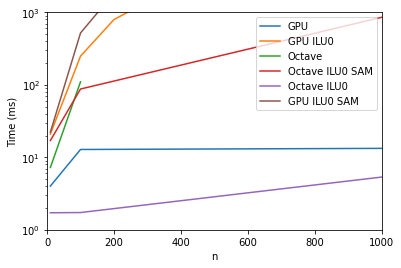

In [10]:
for runType in runs.keys():
    df = runs[runType]
    if runType == 'octave':
        res = df[['size', 'time', 'precond', 'sam']].drop_duplicates().groupby(by=['size', 'precond', 'sam']).mean()
        res.reset_index(level=0, inplace=True)
        res.reset_index(level=0, inplace=True)
        res.reset_index(level=0, inplace=True)
    else:
        res = df[['size', 'time']].drop_duplicates().groupby(by=['size']).mean()
        res.reset_index(level=0, inplace=True)
    res['size'] = np.array(res['size'], np.int64)
    res['time'] = np.array(res['time'], np.float64)
    name = runType
    if name == 'octave':
        for p,s in [(0, 0), (1, 1), (1, 0)]:
            idxs1 = (res['precond'] == p) 
            idxs2 = (res['sam'] == s)
            idxs = idxs1 & idxs2
            sub = res[idxs]
            name = "Octave"
            if p == 1:
                name += " ILU0"
            if s == 1:
                name += " SAM"
            plt.plot(sub['size'], sub['time']*1e3, label=name)
            if name == "Octave":
                plainOctave = sub
        continue
    elif name == 'normal':
        name = "GPU"
        plainGMRES = res
    elif name == 'precond':
        name = "GPU ILU0"
    elif name == 'sam':
        name = "GPU ILU0 SAM"
    res = res.sort_values(by = 'size')
    plt.plot(res['size'], res['time']*1e3, label=name)

plt.yscale('log')
plt.xlim((0, 1000))
plt.xlabel('n')
plt.ylabel('Time (ms)')
plt.ylim((1, 1e3))
plt.legend()
plt.savefig('fig1.png')
plt.show()

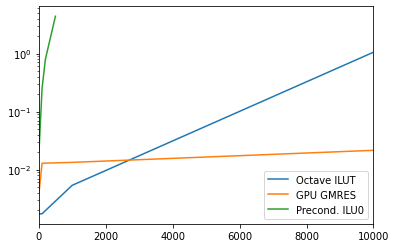

In [6]:
for runType in ['octave', 'normal', 'precond']:
    df = runs[runType]
    if runType == 'octave':
        res = df[['size', 'time', 'precond', 'sam']].drop_duplicates().groupby(by=['size', 'precond', 'sam']).mean()
        res.reset_index(level=0, inplace=True)
        res.reset_index(level=0, inplace=True)
        res.reset_index(level=0, inplace=True)
    else:
        res = df[['size', 'time']].drop_duplicates().groupby(by=['size']).mean()
        res.reset_index(level=0, inplace=True)
    res['size'] = np.array(res['size'], np.int64)
    res['time'] = np.array(res['time'], np.float64)
    name = runType
    if name == 'octave':
        for p,s in [(1, 0)]:
            idxs1 = (res['precond'] == p) 
            idxs2 = (res['sam'] == s)
            idxs = idxs1 & idxs2
            sub = res[idxs]
            name = "Octave"
            if p == 1:
                name += " ILUT"
            if s == 1:
                name += " SAM"
            plt.plot(sub['size'], sub['time'], label=name)
        continue
    elif name == 'normal':
        name = "GPU GMRES"
    elif name == 'precond':
        name = "Precond. ILU0"
    elif name == 'sam':
        name = "SAM"
    res = res.sort_values(by = 'size')
    plt.plot(res['size'], res['time'], label=name)

plt.yscale('log')
plt.xlim((0, 10000))
plt.legend()
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
[1.0, 0.5, 0.271163, 0.110319, 0.0471147, 0.024105, 0.0100505, 0.00417825, 0.00215422, 0.000824957, 0.000394243, 0.000173755, 7.77181e-05, 3.32176e-05, 1.59702e-05, 6.67537e-06, 3.07419e-06, 1.38049e-06, 6.17876e-07, 2.65754e-07, 1.26693e-07, 5.30159e-08, 2.45059e-08, 1.08744e-08, 4.88011e-09, 1.0, 0.27735, 0.109632, 0.032097, 0.00971182, 0.0033296, 0.00104114, 0.000283476, 0.000105541, 2.87062e-05, 9.57051e-06, 2.97726e-06, 9.5678e-07, 2.82629e-07, 9.71586e-08, 2.90871e-08, 1.00176e-08, 4.17801e-09]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85

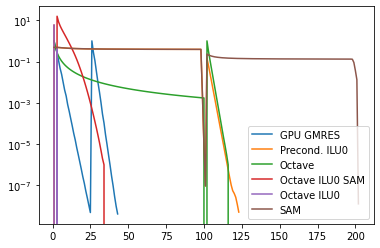

In [7]:
for runType in runs.keys():
    df = runs[runType]
    df['size'] = np.array(df['size'], np.int64)
    if runType == 'octave':
        df = df[(df['run'] == 1) & (df['size'] == 100)]
        res = df[['resNorm', 'iter', 'precond', 'sam', 'round']].drop_duplicates()
        res['resNorm'] = np.array(res['resNorm'], np.float64)
        res['iter'] = np.array(res['iter'], np.int64)
    else:
        idx = (df['run'] == 1)
        idx2 = (df['size'] == 100)
        idx = idx & idx2
        df = df[idx]
        #print(runType)
        #print(df)
        res = df[['iteration', 'error', 'round']].drop_duplicates()
        res['error'] = np.array(res['error'], np.float64)
        res['iteration'] = np.array(res['iteration'], np.int64)
        res['round'] = np.array(list(res['round']), np.int64)
    name = runType
    if name == 'octave':
        for p,s in [(0, 0), (1, 1), (1, 0)]:
            idxs1 = (res['precond'] == p) 
            idxs2 = (res['sam'] == s)
            idxs = idxs1 & idxs2
            sub = res[idxs]
            name = "Octave"
            if p == 1:
                name += " ILU0"
            if s == 1:
                name += " SAM"
            sub = sub.sort_values(by = 'iter')
            print(sub)
            idx1 = sub['round'] == 1
            one = sub[idx1]
            idx2 = sub['round'] == 2
            two = sub[idx2]
            x = list(one['iter'])
            x = x + list(two['iter'] + max(one['iter']))
            y = list(one['resNorm'])
            y = y + list(two['resNorm'])
            plt.plot(x, y, label=name)
        continue
    elif name == 'normal':
        name = "GPU GMRES"
    elif name == 'precond':
        name = "Precond. ILU0"
    elif name == 'sam':
        name = "SAM"
    #print(res)
    res = res.sort_values(by = 'iteration')
    idx1 = res['round'] == 1
    one = res[idx1]
    idx2 = res['round'] == 2
    two = res[idx2]
    x = list(one['iteration'] + 1)
    x = x + list(two['iteration'] + max(one['iteration']) + 2)
    y = list(one['error'])
    y = y + list(two['error'])
    print(x)
    print(y)
    plt.plot(x, y, label=name)

plt.legend()
plt.yscale('log')
plt.ylabel('')
plt.savefig('fig2.png')
plt.show()

In [33]:
plainOctave = plainOctave.reset_index()
plainOctave

,index,sam,precond,size,time
0,0,0,0,10,0.007242
1,3,0,0,100,0.110014


In [34]:
plainGMRES = plainGMRES[plainGMRES['size'] <= 100]
plainGMRES

,size,time
0,10,0.004011
1,100,0.012829


In [35]:
print(plainOctave['time'] / plainGMRES['time'])

0    1.805674
1    8.575705
Name: time, dtype: float64
